### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Getting the Data

In [6]:
import datetime
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [7]:
tesla = pd.read_csv('Tesla_Stock.csv')
ford = pd.read_csv('Ford_Stock.csv')
gm = pd.read_csv('GM_Stock.csv')

In [8]:
tesla.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,28.94,29.50,27.65,28.08,928052
1,2012-01-04,28.21,28.67,27.50,27.71,630036
2,2012-01-05,27.76,27.93,26.85,27.12,1005432
3,2012-01-06,27.20,27.79,26.41,26.89,687081
4,2012-01-09,27.00,27.49,26.12,27.25,896951


In [9]:
ford.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,11.00,11.25,10.99,11.13,45709811
1,2012-01-04,11.15,11.53,11.07,11.30,79725188
2,2012-01-05,11.33,11.63,11.24,11.59,67877467
3,2012-01-06,11.74,11.80,11.52,11.71,59840605
4,2012-01-09,11.83,11.95,11.70,11.80,53981467


In [10]:
gm.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,20.83,21.18,20.75,21.05,9321420
1,2012-01-04,21.05,21.37,20.75,21.15,7856752
2,2012-01-05,21.10,22.29,20.96,22.17,17884040
3,2012-01-06,22.26,23.03,22.24,22.92,18234608
4,2012-01-09,23.20,23.43,22.70,22.84,12091714


### Data Exploration

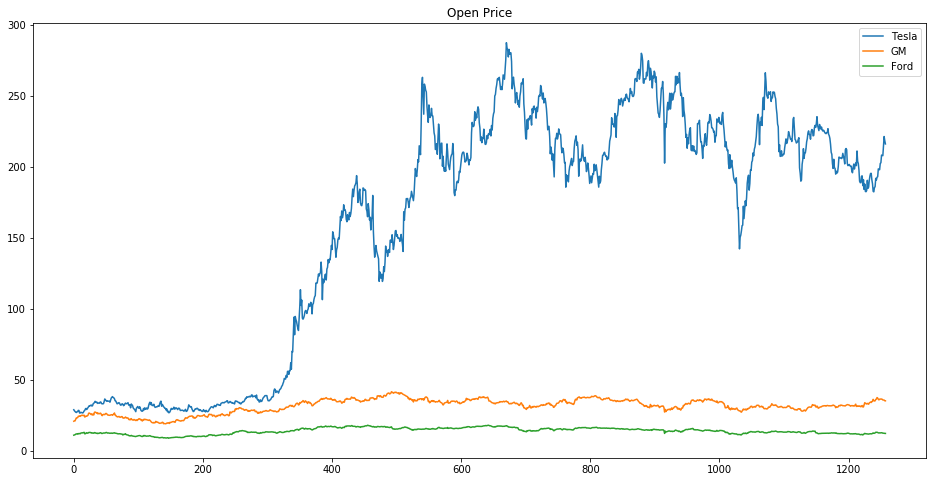

In [11]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

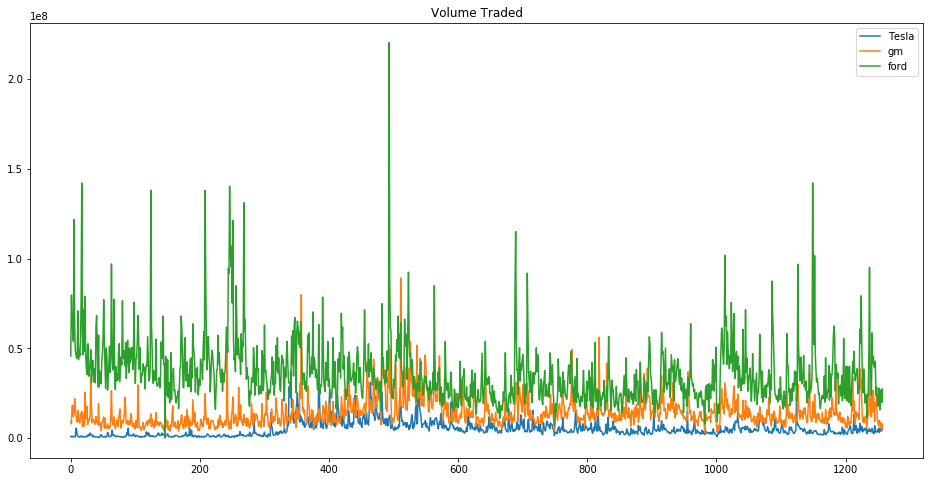

In [12]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

In [13]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

Text(0, 0.5, 'Total Traded')

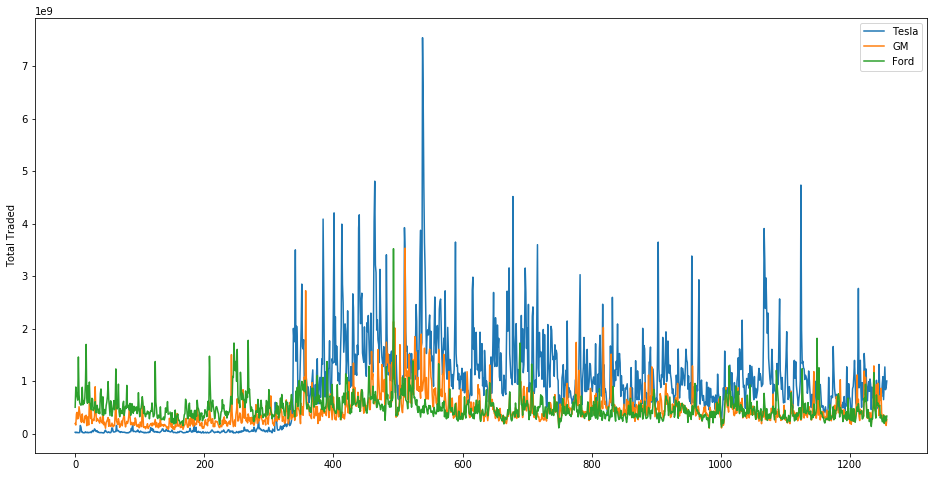

In [15]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

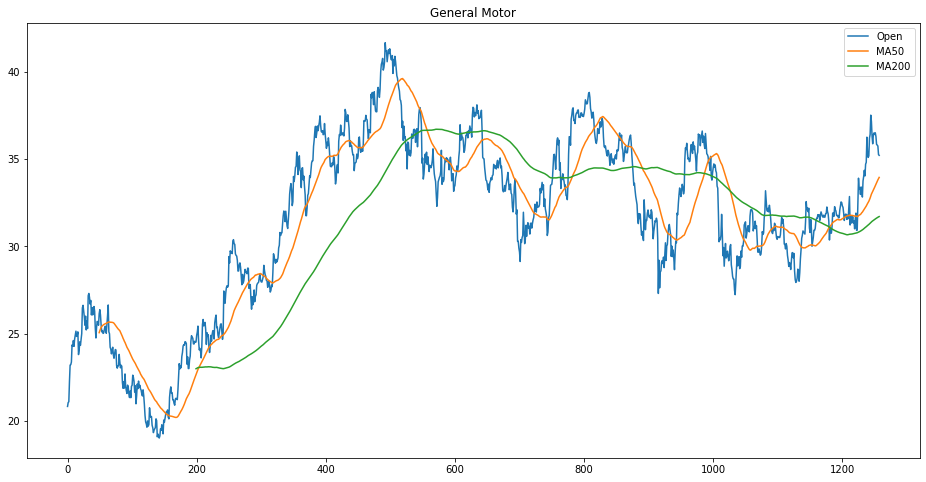

In [17]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8),title='General Motor')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015CA9AFDDC8>,
      dtype=object)

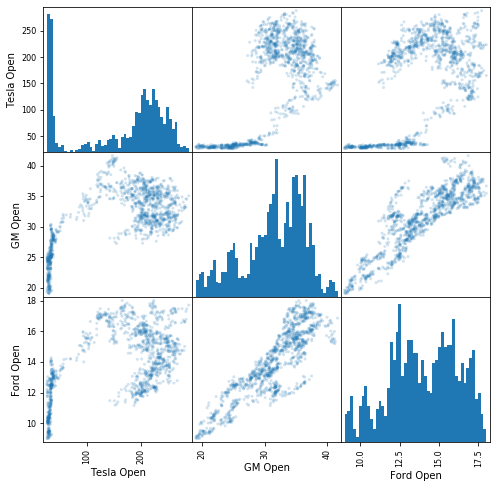

In [18]:
from pandas.plotting import scatter_matrix
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open']
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})

### Daily Returns

In [20]:
tesla['returns'] = tesla['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

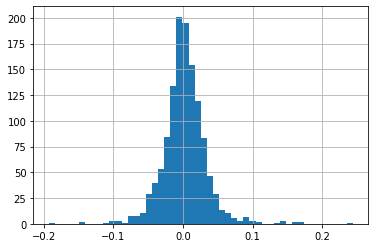

In [21]:
tesla['returns'].hist(bins=50)

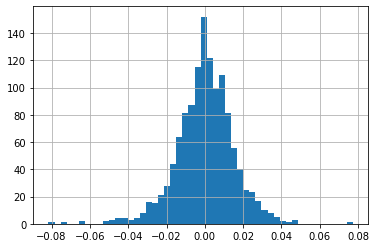

In [22]:
ford['returns'].hist(bins=50)

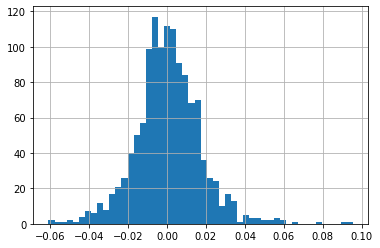

In [23]:
gm['returns'].hist(bins=50)

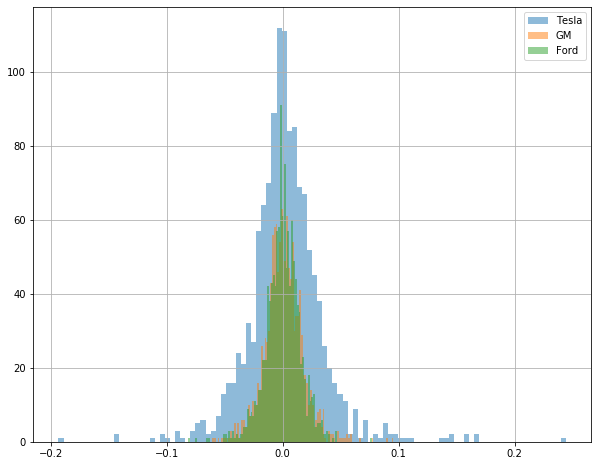

In [24]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

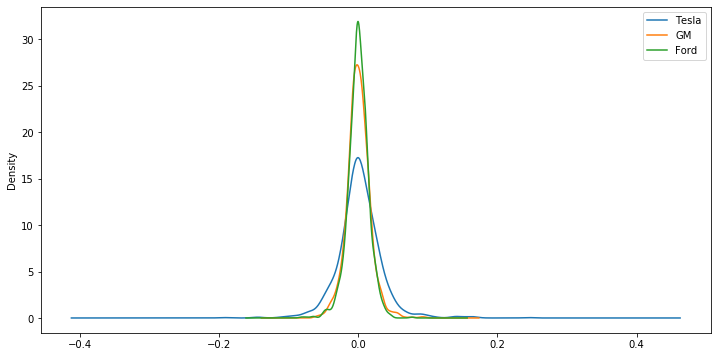

In [25]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

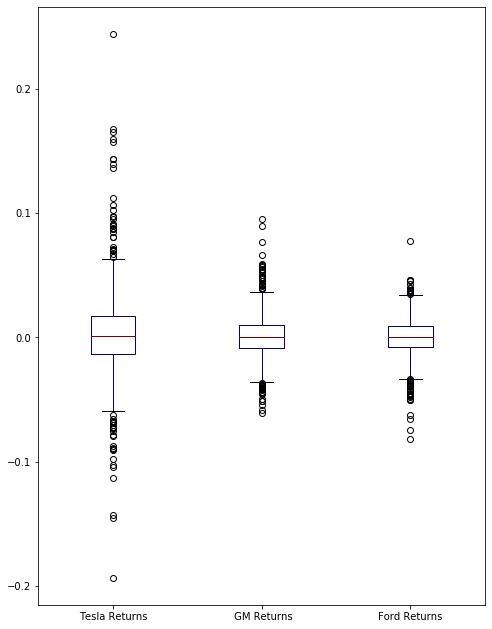

In [26]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015CAC6E9548>,
      dtype=object)

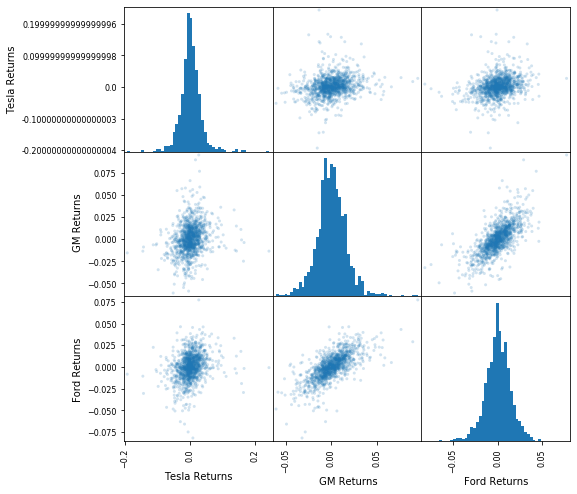

In [27]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})

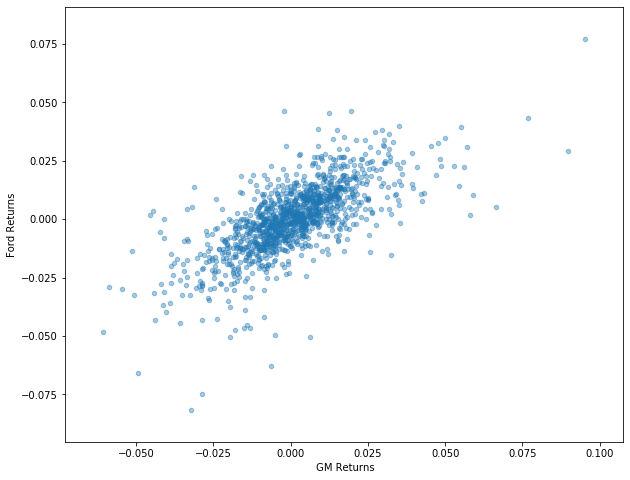

In [28]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

### Cumulative Daily Returns

In [29]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

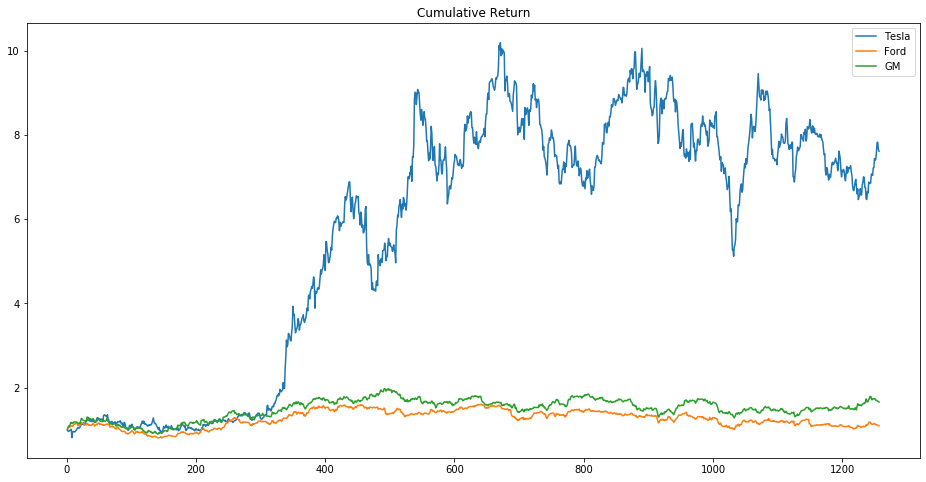

In [30]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()